In [1]:
#-- coding:utf-8 --

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# Data

In [3]:
train = pd.read_csv('data/train.csv')
test_a = pd.read_csv('data/test_a.csv')
train.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,2,2014-07-01,1,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,46000.0,2,2012-08-01,0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,May-2002,1723.0,1.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,74000.0,2,2015-10-01,0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,May-2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,118000.0,1,2015-08-01,0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,May-1999,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,29000.0,2,2016-03-01,0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,Aug-1977,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

# EDA

In [5]:
train.isDefault.value_counts()

0    640390
1    159610
Name: isDefault, dtype: int64

## 1. Numerical Features

<AxesSubplot:xlabel='loanAmnt', ylabel='Count'>

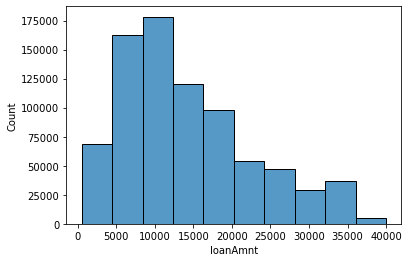

In [6]:
# loanAmnt
sns.histplot(train['loanAmnt'], bins=10)

<AxesSubplot:xlabel='interestRate', ylabel='Count'>

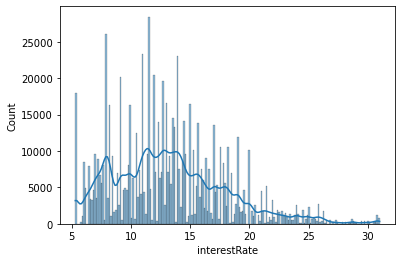

In [7]:
# interestRate
sns.histplot(train['interestRate'], kde=True)

<AxesSubplot:xlabel='installment', ylabel='Count'>

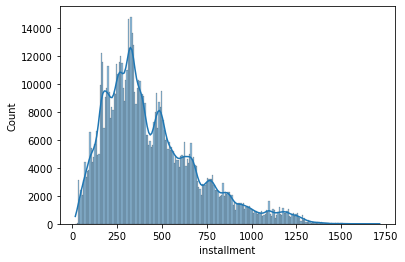

In [8]:
# installment
sns.histplot(train['installment'], kde=True)

In [9]:
# employmentLength -> employmentLength_num
def get_employmentLength_num(x):
    if x=='10+ years':
        return 15
    elif x=='< 1 year':
        return 0
    else:
        return str(x)[:2]

train['employmentLength_num'] = train['employmentLength'].transform(get_employmentLength_num)
train['employmentLength_num'] = train['employmentLength_num'].replace('na', np.nan)
train['employmentLength_num'] = train['employmentLength_num'].astype("float")

test_a['employmentLength_num'] = test_a['employmentLength'].transform(get_employmentLength_num)
test_a['employmentLength_num'] = test_a['employmentLength_num'].replace('na', np.nan)
test_a['employmentLength_num'] = test_a['employmentLength_num'].astype("float")

train['employmentLength_num']

0          2.0
1          5.0
2          8.0
3         15.0
4          NaN
          ... 
799995     7.0
799996    15.0
799997    15.0
799998    15.0
799999     5.0
Name: employmentLength_num, Length: 800000, dtype: float64

<AxesSubplot:xlabel='annualIncome', ylabel='Count'>

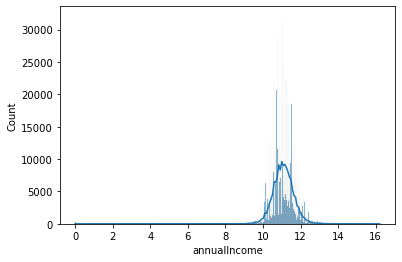

In [10]:
# annualIncome
sns.histplot(np.log(train['annualIncome'] + 1), kde=True)

In [11]:
train['annualIncome'].describe()

count    8.000000e+05
mean     7.613391e+04
std      6.894751e+04
min      0.000000e+00
25%      4.560000e+04
50%      6.500000e+04
75%      9.000000e+04
max      1.099920e+07
Name: annualIncome, dtype: float64

In [12]:
# issueDate -> timestamp
import time
# time.strptime(train.loc[0,'issueDate'], '%Y-%m-%d')
# train['timestamp']= map(lambda x: time.mktime(time.strftime(x, '%Y-%m-%d')), train['issueDate'])
train['timestamp'] = train['issueDate'].map(lambda x: time.mktime(time.strptime(x, '%Y-%m-%d')))
test_a['timestamp'] = test_a['issueDate'].astype(str).map(lambda x: time.mktime(time.strptime(x, '%Y-%m-%d')))

# train['issueDate'].map(lambda x: time.mktime(time.strftime(x, '%Y-%m-%d')))
train['timestamp'] = (train['timestamp']-min(train['timestamp']))/1e6
test_a['timestamp'] = (test_a['timestamp']-min(train['timestamp']))/1e6

train['timestamp']

0         223.5168
1         163.1232
2         263.0016
3         257.7312
4         276.1344
            ...   
799995    286.6752
799996    184.1184
799997    263.0016
799998    242.0928
799999    352.4256
Name: timestamp, Length: 800000, dtype: float64

<AxesSubplot:xlabel='dti', ylabel='Count'>

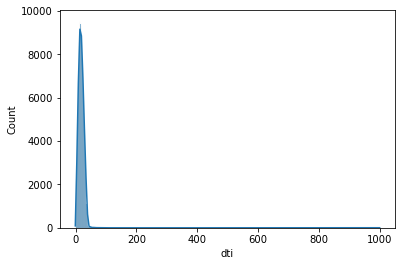

In [13]:
# dti
sns.histplot(train['dti'], kde=True)

In [14]:
train['dti'].describe()

count    799761.000000
mean         18.284557
std          11.150155
min          -1.000000
25%          11.790000
50%          17.610000
75%          24.060000
max         999.000000
Name: dti, dtype: float64

<AxesSubplot:xlabel='delinquency_2years', ylabel='Count'>

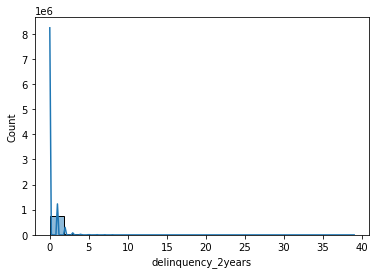

In [15]:
# delinquency_2years
sns.histplot(train['delinquency_2years'], kde=True)

In [16]:
train['delinquency_2years'].describe()

count    800000.000000
mean          0.318239
std           0.880325
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          39.000000
Name: delinquency_2years, dtype: float64

<AxesSubplot:ylabel='Count'>

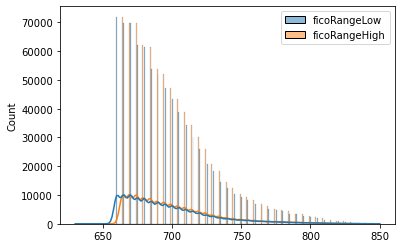

In [17]:
# ficoRangeLow, ficoRangeHigh
sns.histplot(train[['ficoRangeLow','ficoRangeHigh']], kde=True)

<AxesSubplot:xlabel='openAcc', ylabel='Count'>

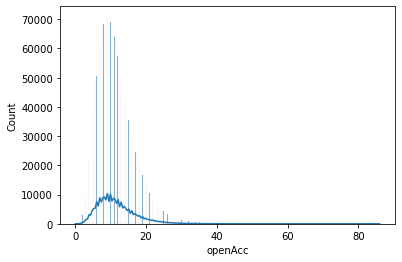

In [18]:
# openACC
sns.histplot(train['openAcc'], kde=True)

<AxesSubplot:xlabel='pubRec', ylabel='Count'>

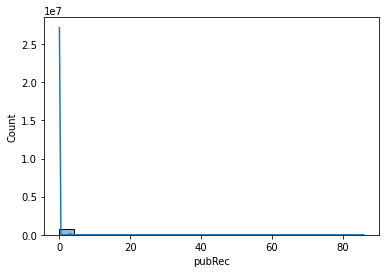

In [19]:
# pubRec
sns.histplot(train['pubRec'], kde=True)

<AxesSubplot:xlabel='pubRecBankruptcies', ylabel='Count'>

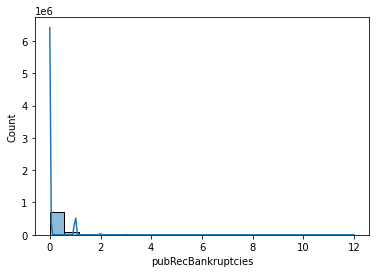

In [20]:
# pubRecBankruptcies
sns.histplot(train['pubRecBankruptcies'], kde=True)

<AxesSubplot:xlabel='revolBal', ylabel='Count'>

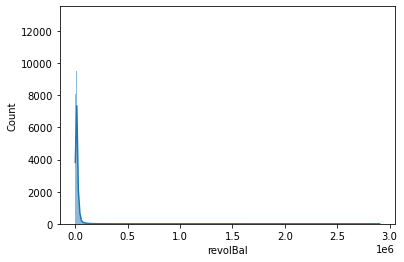

In [21]:
# revolBal:Total credit turnover balance
sns.histplot(train['revolBal'], kde=True)

<AxesSubplot:xlabel='revolUtil', ylabel='Count'>

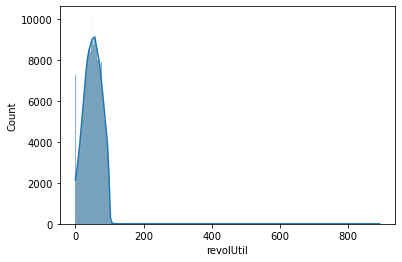

In [22]:
# revolUtil:Total credit turnover balance
sns.histplot(train['revolUtil'], kde=True)

<AxesSubplot:xlabel='totalAcc', ylabel='Count'>

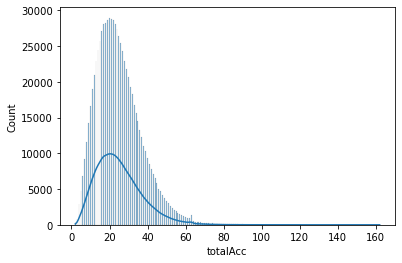

In [23]:
# totalACC
sns.histplot(train['totalAcc'], kde=True)

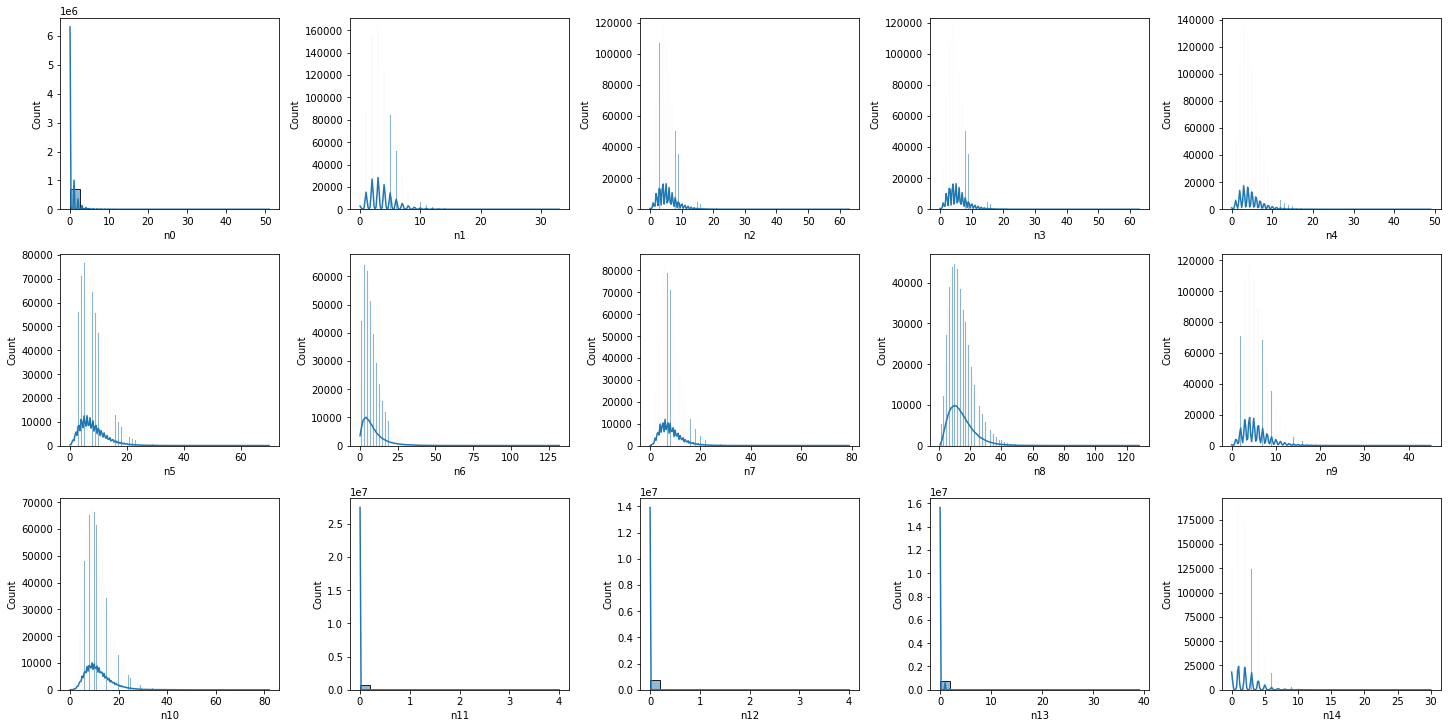

In [24]:
select_features = ['n0', 'n1', 'n2', 'n3', 'n4', 
                   'n5', 'n6', 'n7', 'n8', 'n9', 
                   'n10', 'n11', 'n12', 'n13', 'n14']
fig, axes = plt.subplots(3, 5, constrained_layout=True, figsize=(20, 10))
k = 0
for i in tqdm(range(3)):
    for j in range(5):
        sns.histplot(train, x=select_features[k], kde=True, ax=axes[i][j])
        k+=1

In [25]:
num_features = ['loanAmnt', 'interestRate', 'installment', 'employmentLength_num', 'annualIncome','timestamp','dti',
                'delinquency_2years','ficoRangeLow','ficoRangeHigh','openAcc','pubRec','pubRecBankruptcies','revolBal','totalAcc', 
                'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8','n9', 'n10', 'n11', 'n12', 'n13', 'n14'
               ]

# Categorical Features

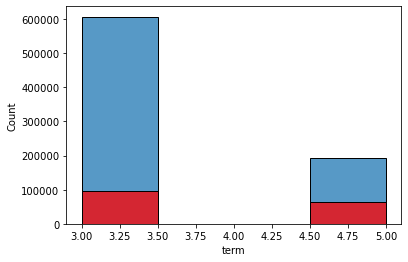

In [26]:
# term 3, 5
sns.histplot(train, x='term',bins=4);
sns.histplot(train[train['isDefault']==1], x='term',color='r',bins=4);

<AxesSubplot:xlabel='grade', ylabel='Count'>

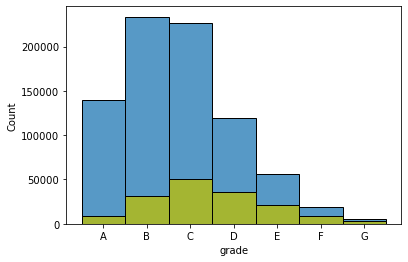

In [27]:
# grade subGrade
sns.histplot(train.sort_values(by='grade'),x='grade', bins=10)
sns.histplot(train[train['isDefault']==1].sort_values(by='grade'), x='grade',color='y',bins=10)

In [28]:
group = train.groupby('grade').agg({'isDefault':'mean'})
group.columns = ['avg_defalult_ratio_of_grade']
group

,avg_defalult_ratio_of_grade
grade,
A,0.060375
B,0.132992
C,0.225020
D,0.303852
E,0.384291
F,0.453524
G,0.497017


<AxesSubplot:xlabel='subGrade', ylabel='Count'>

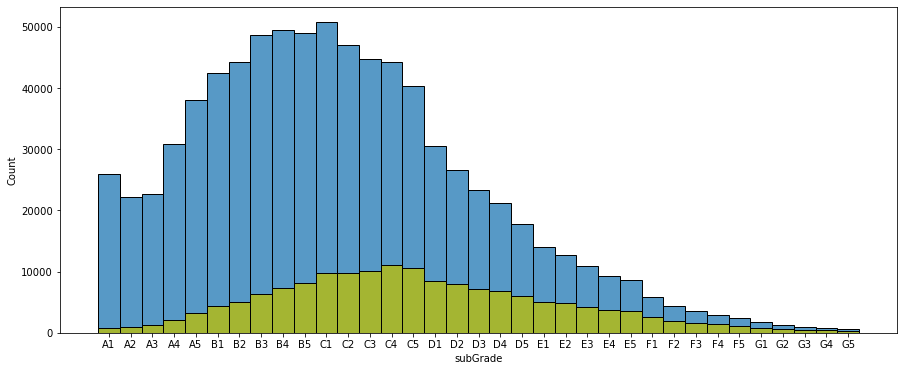

In [29]:
plt.figure(figsize=(15,6))
sns.histplot(train.sort_values(by='subGrade'),x='subGrade', bins=10)
sns.histplot(train[train['isDefault']==1].sort_values(by='subGrade'), x='subGrade',color='y',bins=10)

<AxesSubplot:xlabel='subGrade', ylabel='Count'>

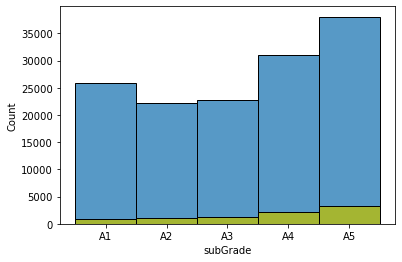

In [30]:
sns.histplot(train[(train['grade']=='A')].sort_values(by='subGrade'),x='subGrade', bins=10)
sns.histplot(train[(train['grade']=='A') & (train['isDefault']==1)].sort_values(by='subGrade'), x='subGrade',color='y',bins=10)

In [31]:
group2 = train.groupby('subGrade').agg({'isDefault':'mean'})
group2.columns = ['avg_defalult_ratio_of_Subgrade']
group2

,avg_defalult_ratio_of_Subgrade
subGrade,
A1,0.031919
A2,0.045697
A3,0.055882
A4,0.067221
A5,0.085399
B1,0.102921
B2,0.112262
B3,0.129239
B4,0.148639


In [32]:
encoder = LabelEncoder()
train['grade_2'] = encoder.fit_transform(train['grade'])
test_a['grade_2'] = encoder.fit_transform(test_a['grade'])
train['subGrade_2'] = encoder.fit_transform(train['subGrade'])
test_a['subGrade_2'] = encoder.fit_transform(test_a['subGrade'])
train['subGrade_2']

0         21
1         16
2         17
3          3
4         11
          ..
799995    13
799996     3
799997    12
799998     3
799999     7
Name: subGrade_2, Length: 800000, dtype: int32

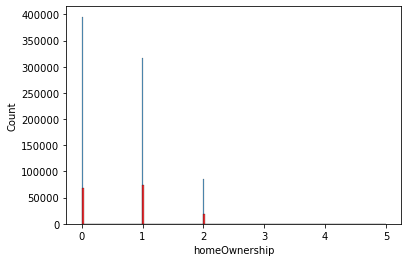

In [33]:
# homeOwnership
sns.histplot(train, x='homeOwnership');
sns.histplot(train[train['isDefault']==1], x='homeOwnership',color='r');

In [34]:
group = train.groupby('homeOwnership').agg({'isDefault':'mean'})
group.columns = ['avg_defalult_ratio_of_homeOwnership']
group

,avg_defalult_ratio_of_homeOwnership
homeOwnership,
0,0.171535
1,0.232107
2,0.207800
3,0.205405
4,0.151515
5,0.234568


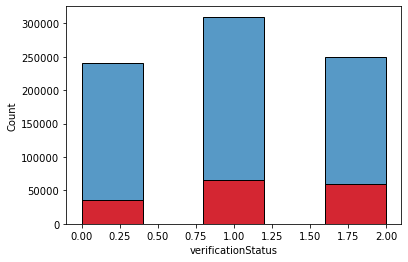

In [35]:
# verificationStatus
sns.histplot(train, x='verificationStatus', bins=5);
sns.histplot(train[train['isDefault']==1], x='verificationStatus',color='r',bins=5);

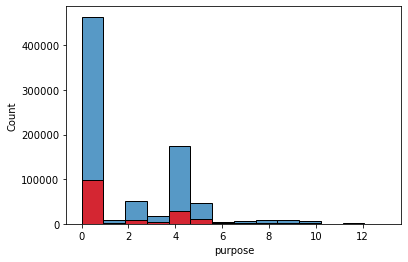

In [36]:
# purpose
sns.histplot(train, x='purpose',bins=14);
sns.histplot(train[train['isDefault']==1], x='purpose',color='r',bins=14);

In [37]:
# verificationStatus
print(train['policyCode'].value_counts())
print(test_a['policyCode'].value_counts())

1.0    800000
Name: policyCode, dtype: int64
1    200000
Name: policyCode, dtype: int64


In [38]:
# sns.histplot(train, x='policyCode');
# sns.histplot(train[train['isDefault']==1], x='policyCode',color='r');

In [39]:
# postCode
train['postCode'].sort_index().value_counts()

134.0    8956
19.0     8611
51.0     8161
31.0     7337
4.0      7176
         ... 
858.0       1
937.0       1
938.0       1
915.0       1
916.0       1
Name: postCode, Length: 932, dtype: int64

In [40]:
# regionCode
len(train['regionCode'].value_counts())

51

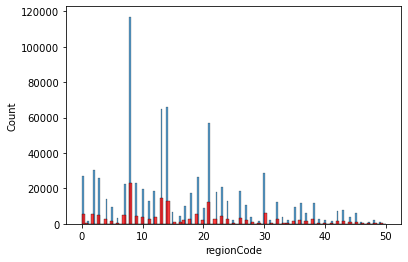

In [41]:
sns.histplot(train, x='regionCode');
sns.histplot(train[train['isDefault']==1], x='regionCode',color='r');

In [42]:
group = train.groupby('regionCode').agg({'isDefault':'mean'})
group.columns = ['avg_defalult_ratio_of_regionCode']
group

,avg_defalult_ratio_of_regionCode
regionCode,
0,0.208352
1,0.208128
2,0.181267
3,0.185671
4,0.197009
5,0.160317
6,0.175915
7,0.208407
8,0.195115


In [43]:
group.sort_values(by='avg_defalult_ratio_of_regionCode')

,avg_defalult_ratio_of_regionCode
regionCode,
25,0.135109
47,0.140148
29,0.141026
35,0.142207
33,0.146712
22,0.155626
39,0.156643
18,0.159262
5,0.160317


<AxesSubplot:xlabel='regionCode', ylabel='avg_defalult_ratio_of_regionCode'>

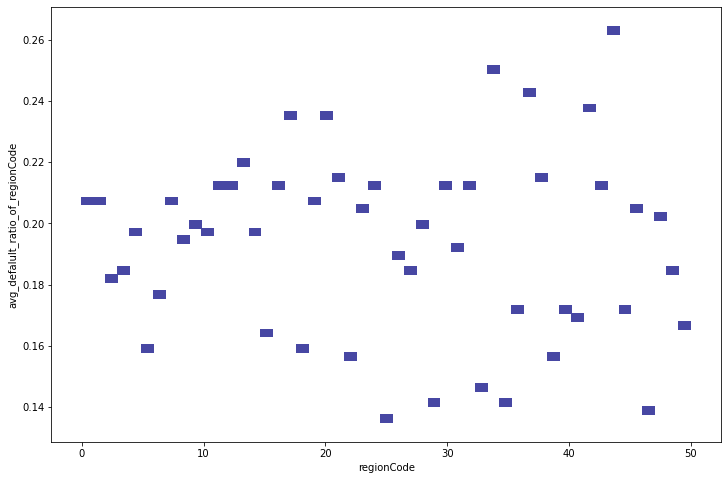

In [44]:
plt.figure(figsize=(12,8))
sns.histplot(group,x='regionCode',y='avg_defalult_ratio_of_regionCode', bins=51,color='blue')

In [45]:
categorical_features = ['term','homeOwnership','verificationStatus','purpose','subGrade_2','regionCode']

In [46]:
features = num_features + categorical_features
features

['loanAmnt',
 'interestRate',
 'installment',
 'employmentLength_num',
 'annualIncome',
 'timestamp',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'totalAcc',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14',
 'term',
 'homeOwnership',
 'verificationStatus',
 'purpose',
 'subGrade_2',
 'regionCode']

In [47]:
# train.to_csv('data/train_1.csv',index=0)
# test_a.to_csv('data/test_a_1.csv',index=0)

In [48]:
def get_earliesCreditLine_m(earliesCreditLine):
    month, year = earliesCreditLine.split('-')
    return month

def get_earliesCreditLine_Y(earliesCreditLine):
    month, year = earliesCreditLine.split('-')
    return year

def trans_earliesCreditLine(earliesCreditLine):
    month_dict = {"Jan":1, "Feb":2, "Mar":3, "Apr":4, "May":5, "Jun":6, \
                  "Jul":7, "Aug":8, "Sep":9, "Oct":10, "Nov":11, "Dec":12}
    month, year = earliesCreditLine.split('-')
    month = month_dict[month]
    return int(year)*12 + month

month_dict = {"Jan":1, "Feb":2, "Mar":3, "Apr":4, "May":5, "Jun":6, \
              "Jul":7, "Aug":8, "Sep":9, "Oct":10, "Nov":11, "Dec":12}


def get_issueDate_y(issueDate):
    year, month, day = issueDate.split('-')
    return year
def get_issueDate_m(issueDate):
    year, month, day = issueDate.split('-')
    return month
def get_issueDate_d(issueDate):
    year, month, day = issueDate.split('-')
    return day


train['earliesCreditLine_m'] = train['earliesCreditLine'].apply(lambda x: get_earliesCreditLine_m(x))
train['earliesCreditLine_m'] = train['earliesCreditLine_m'].apply(lambda x: month_dict[x])
train['earliesCreditLine_Y'] = train['earliesCreditLine'].apply(lambda x: get_earliesCreditLine_Y(x)).astype(int)
train['earliesCreditLine_trans'] = train['earliesCreditLine'].apply(lambda x: trans_earliesCreditLine(x))
# train[['earliesCreditLine_m','earliesCreditLine_Y','earliesCreditLine_trans']]


train['issueDate_Y'] = train['issueDate'].apply(lambda x: get_issueDate_y(x)).astype(int)
train['issueDate_m'] = train['issueDate'].apply(lambda x: get_issueDate_m(x)).astype(int)
# train['issueDate_d'] = train['issueDate'].apply(lambda x: get_issueDate_d(x)).astype(int)
train['issueDate_trans'] =  train['issueDate_Y']*12+train['issueDate_m']
# train[['issueDate_Y','issueDate_m', 'issueDate_trans']]

In [49]:
group1 = train.groupby('issueDate_Y').agg({'isDefault':'mean'}).reindex()
group1.columns = ['Default_Rate']
group1.reset_index(inplace = True)
group1

,issueDate_Y,Default_Rate
0,2007,0.178344
1,2008,0.162073
2,2009,0.124775
3,2010,0.131468
4,2011,0.145621
5,2012,0.159931
6,2013,0.155974
7,2014,0.184278
8,2015,0.202053
9,2016,0.233084


In [50]:
group2 = train.groupby('issueDate_trans').agg({'isDefault':'mean'}).reindex()
group2.columns = ['Default_Rate']
group2.reset_index(inplace = True)
group2

,issueDate_trans,Default_Rate
0,24090,0.000000
1,24091,0.000000
2,24092,0.173913
3,24093,0.285714
4,24094,0.269231
...,...,...
134,24224,0.081120
135,24225,0.074982
136,24226,0.043930
137,24227,0.013514


In [51]:
group3 = train.groupby('issueDate_m').agg({'isDefault':'mean'}).reindex()
group3.columns = ['Default_Rate']
group3.reset_index(inplace = True)
group3

,issueDate_m,Default_Rate
0,1,0.190948
1,2,0.191409
2,3,0.202784
3,4,0.209204
4,5,0.205296
5,6,0.206889
6,7,0.205550
7,8,0.199575
8,9,0.202622
9,10,0.191226


Text(0, 0.5, 'Defalult_Rate')

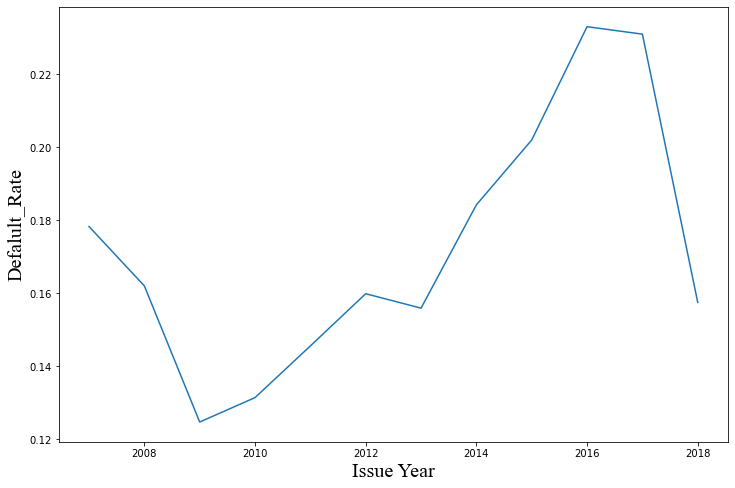

In [52]:
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 20,
}

plt.figure(figsize=(12,8))
sns.lineplot(data=group1, x='issueDate_Y', y='Default_Rate')
plt.xlabel('Issue Year',font2)
plt.ylabel('Defalult_Rate',font2)

Text(0, 0.5, 'Defalult_Rate')

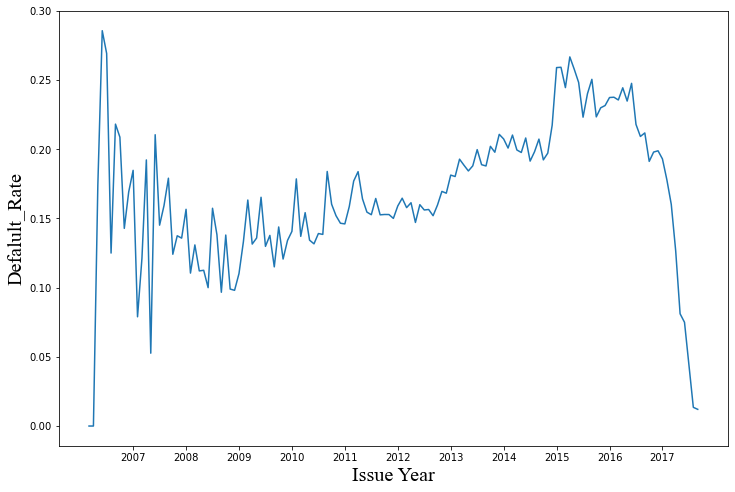

In [53]:
plt.figure(figsize=(12,8))
g = sns.lineplot(data=group2, x='issueDate_trans', y='Default_Rate')
g.set(xticks=np.arange(24100,24232, 12))  # tick范围和间隔
g.set_xticklabels([i for i in range(2007, 2018)])  # 新的ticks

plt.xlabel('Issue Year',font2)
plt.ylabel('Defalult_Rate',font2)

Text(0, 0.5, 'Defalult_Rate')

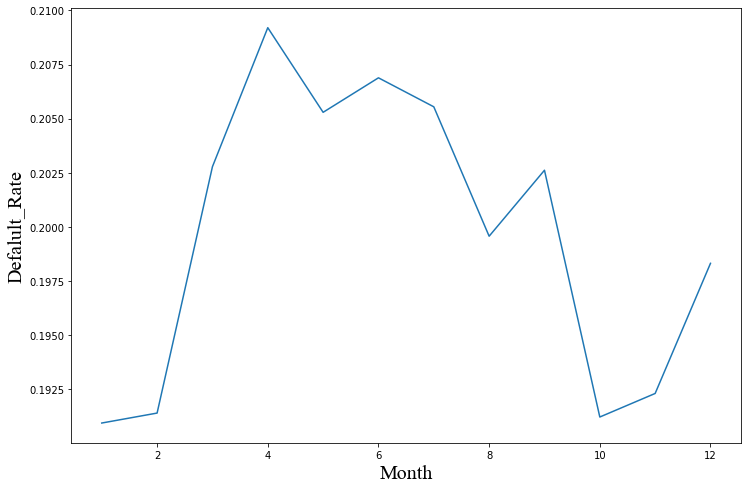

In [54]:
plt.figure(figsize=(12,8))
sns.lineplot(data=group3, x='issueDate_m', y='Default_Rate',)
plt.xlabel('Month',font2)
plt.ylabel('Defalult_Rate',font2)

# Corr

In [55]:
corr_matrix = train[features].astype(float).corr()
corr_matrix

,loanAmnt,interestRate,installment,employmentLength_num,annualIncome,timestamp,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,totalAcc,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,term,homeOwnership,verificationStatus,purpose,subGrade_2,regionCode
loanAmnt,1.000000,0.142288,0.953369,0.092257,0.315361,0.033287,0.032480,-0.002052,0.102498,0.102497,0.185288,-0.066391,-0.095834,0.315078,0.208138,-0.050507,0.194709,0.151183,0.151183,0.214087,0.196700,0.077345,0.165590,0.169894,0.150425,0.182270,-0.000491,0.001892,-0.021748,-0.020512,0.381142,-0.141214,0.223371,-0.153392,0.147163,-0.011381
interestRate,0.142288,1.000000,0.154550,-0.004795,-0.073364,-0.003412,0.146670,0.048216,-0.405105,-0.405101,-0.003662,0.052276,0.057982,-0.026073,-0.041803,0.042943,0.023797,0.088127,0.088127,-0.053248,-0.081653,0.009957,-0.006929,-0.054517,0.087815,-0.009082,0.004667,0.014422,0.026755,0.208503,0.416827,0.051608,0.255346,-0.061955,0.976593,0.002452
installment,0.953369,0.154550,1.000000,0.079955,0.305667,0.036803,0.036423,0.007405,0.052370,0.052370,0.175928,-0.055170,-0.088073,0.303178,0.185532,-0.041347,0.197875,0.158924,0.158924,0.206892,0.184170,0.061476,0.161903,0.158374,0.158049,0.171800,0.000367,0.004203,-0.016201,0.000225,0.142894,-0.115779,0.225758,-0.149534,0.150236,-0.012978
employmentLength_num,0.092257,-0.004795,0.079955,1.000000,0.069727,0.022720,0.025948,0.027204,0.019932,0.019932,0.045070,0.028913,0.026289,0.089658,0.112102,0.015570,0.074583,0.124018,0.124018,0.065998,0.116112,-0.046973,0.111750,0.151122,0.125080,0.038426,0.004497,0.007962,0.001181,0.024265,0.054668,-0.127068,0.030678,-0.036230,-0.006057,0.003120
annualIncome,0.315361,-0.073364,0.305667,0.069727,1.000000,0.037861,-0.142018,0.041592,0.072809,0.072810,0.135522,-0.008166,-0.047141,0.288426,0.177919,0.017348,0.104508,0.072670,0.072670,0.123160,0.127600,0.102260,0.078343,0.102513,0.071495,0.132740,0.005922,0.012014,0.006819,0.052397,0.051000,-0.117331,0.040493,-0.004965,-0.072980,-0.022829
timestamp,0.033287,-0.003412,0.036803,0.022720,0.037861,1.000000,0.079206,0.031107,-0.003636,-0.003634,0.062863,0.067455,0.068541,-0.002415,0.003552,0.037687,-0.039964,-0.049854,-0.049854,0.012216,-0.108596,0.037458,0.000584,-0.064610,-0.059082,0.021334,-0.000407,-0.000994,0.006048,0.094342,-0.007110,0.017015,-0.041490,-0.004328,-0.001266,0.024804
dti,0.032480,0.146670,0.036423,0.025948,-0.142018,0.079206,1.000000,-0.008538,-0.062268,-0.062270,0.224884,-0.030884,-0.017706,0.108492,0.172724,-0.034391,0.128226,0.192271,0.192271,0.079842,0.051040,0.173798,0.137206,0.099572,0.194525,0.218029,-0.003276,0.005326,-0.014415,0.069965,0.058793,0.000988,0.075847,-0.057891,0.151218,0.023622
delinquency_2years,-0.002052,0.048216,0.007405,0.027204,0.041592,0.031107,-0.008538,1.000000,-0.174697,-0.174695,0.052401,-0.021258,-0.047999,-0.028569,0.119920,0.218986,-0.044143,-0.006337,-0.006337,-0.032964,0.031635,0.085932,0.005440,0.076264,-0.010027,0.047264,0.043564,0.103114,0.658946,-0.024247,-0.008589,-0.030878,0.009890,-0.010399,0.054634,0.002109
ficoRangeLow,0.102498,-0.405105,0.052370,0.019932,0.072809,-0.003636,-0.062268,-0.174697,1.000000,1.000000,0.016822,-0.190886,-0.203517,0.027184,0.021001,-0.196923,-0.110503,-0.188237,-0.188237,0.062858,0.055663,-0.012874,0.016460,0.021942,-0.187287,0.033007,-0.017024,-0.029925,-0.101940,-0.093462,-0.001435,-0.062044,-0.130635,0.052965,-0.423506,-0.000910
ficoRangeHigh,0.102497,-0.405101,0.052370,0.019932,0.072810,-0.003634,-0.062270,-0.174695,1.000000,1.000000,0.016821,-0.190883,-0.203514,0.027182,0.021000,-0.196920,-0.110504,-0.188238,-0.188238,0.062857,0.055662,-0.012876,0.016459,0.021942,-0.187288,0.033005,-0.017024,-0.029925,-0.101938,-0.093464,-0.001435,-0.062045,-0.130633,0.052966,-0.423503,-0.000910


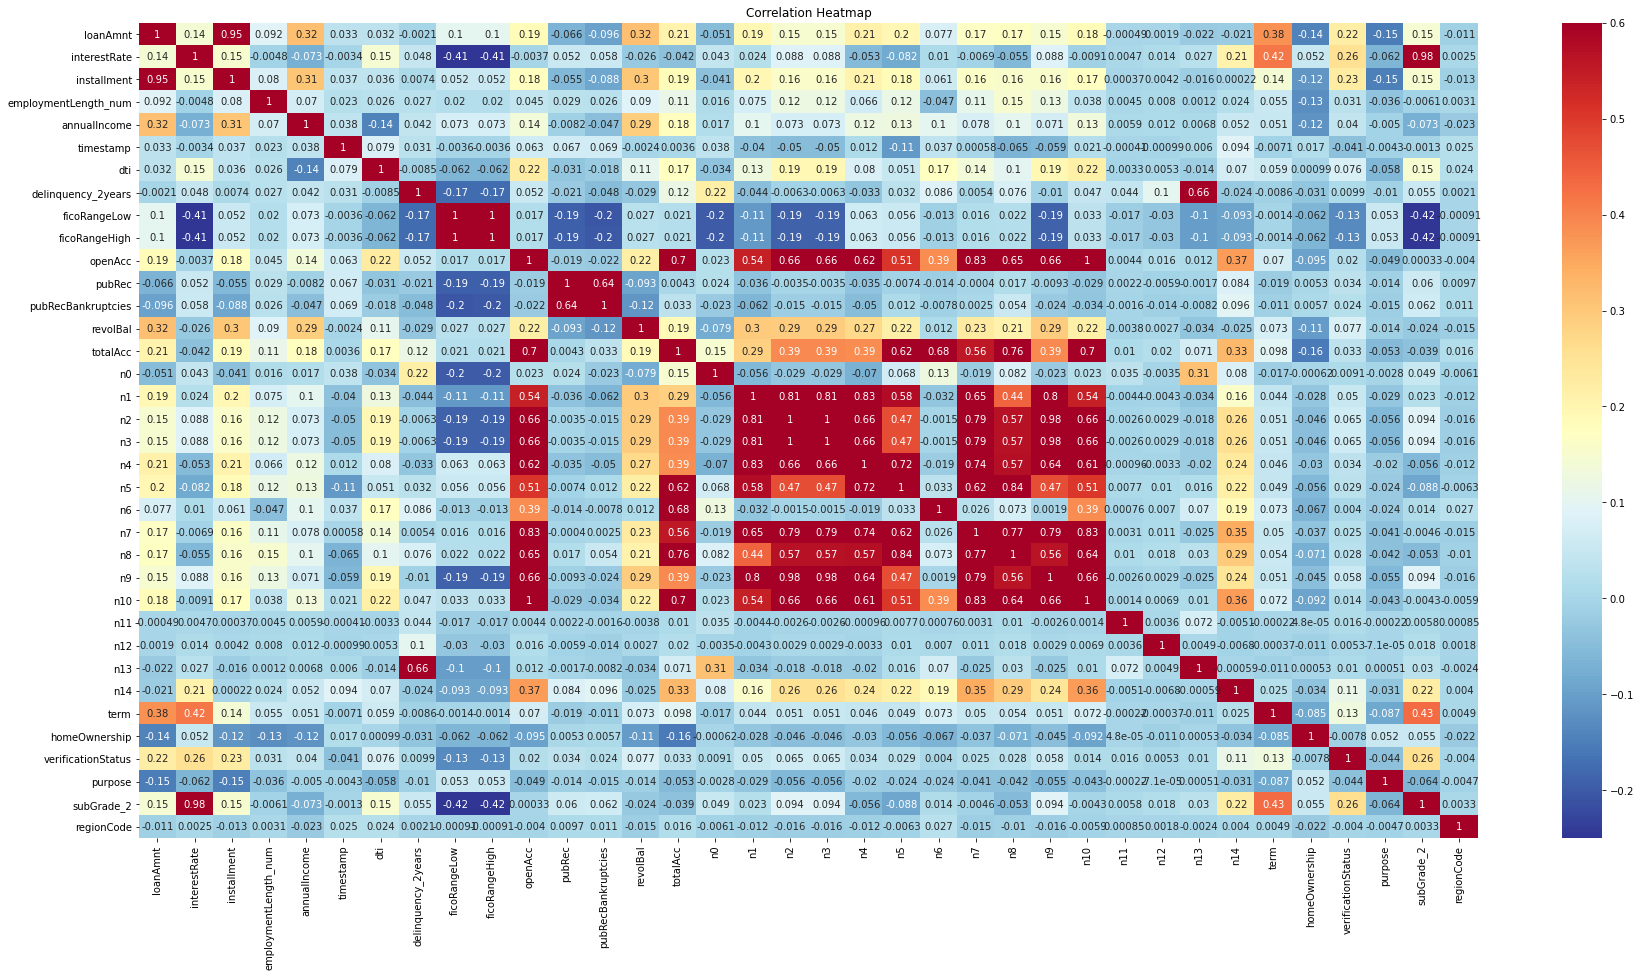

In [56]:
plt.figure(figsize = (30, 15))

# Heatmap of correlations
sns.heatmap(corr_matrix, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');
plt.savefig('corr.png');

In [57]:
train[['interestRate', 'grade_2', 'subGrade_2']].corr()

,interestRate,grade_2,subGrade_2
interestRate,1.000000,0.953269,0.976593
grade_2,0.953269,1.000000,0.975609
subGrade_2,0.976593,0.975609,1.000000
